In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Draft (get columns of the tables)


In [9]:
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
data = session.query(Measurement.date).all()


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
data = session.query(Measurement.date).all()
data[-1]

('2017-08-23',)

In [14]:
# Find the most recent date in the data set. other way
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

2016-08-23


<Axes: xlabel='Date', ylabel='Inches'>

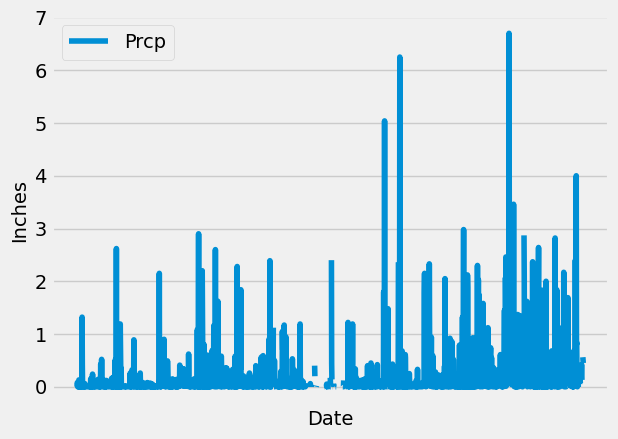

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
import datetime as dt

recent_date = dt.date(2017,8,23)
f_date = recent_date - dt.timedelta(days = 365)
print(f_date)

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
plot_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= f_date).filter(Measurement.date <=recent_date).all()
plot_data_df = pd.DataFrame(plot_data, columns = ['Date', 'Prcp'])

plot_data_df





# Sort the dataframe by date

# plot_data_df.sort_values(by='Date',ascending=True)

plot_data_df.plot(xticks=[], xlabel = 'Date', ylabel = 'Inches')


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
plot_data_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()


9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by((func.count(Measurement.station).desc())).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

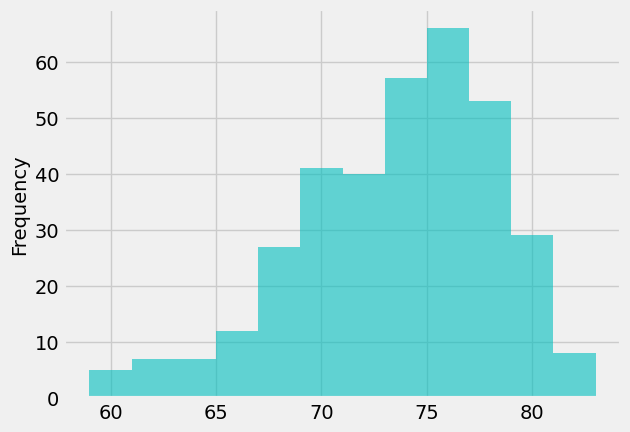

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
ac_station = session.query( Measurement.tobs).filter(Measurement.date >= f_date).filter(Measurement.date <=recent_date).filter(Measurement.station == 'USC00519281').all()
ac_station_df = pd.DataFrame(ac_station, columns = ['Temp'])
ac_station_df


ax = ac_station_df['Temp'].plot.hist( bins = 12, color = 'c', alpha = 0.6)

plt.ylabel("Frequency")


# Close Session

In [16]:
# Close Session
session.close()